### Probelm Statement 
Develop a predictive model which helps to predict whether given firm going
to be bankrupt or not using the financial data available. The given data contains
financial ratios of various firms and the target attribute tells whether the firm has
got bankrupt in the subsequent years or not.

#### Strategy
      
      1.Data Loading
      2.Data Preprocessing
            a.plotting Data to understand Data Spread and outliers
            b.Missing Value Detection and removal of Columns and rows with huge percentange of Nan/Na's 
            c.Correlations to reduce number of variables 
            d.Imputing Missing Values
        
      3.Splitting Data into Train and Test
      4.Standardizing Data
      5.Model Building  
            a.Logistic Regression
            b.Naive Bayes Classification
            c.KNN Classification
            d.DecisionTrees
            b.RandomForest Classification
      6.Metrics
      7.Conclusion.


#### Data Loading

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline
sns.set(style="white")

In [2]:
bank= pd.read_csv("./Data/bankdata.csv")

In [3]:
#Feature extracted DataFrame from rawdata
Mybank=pd.read_csv("./MyBank.csv")

In [4]:
bank.shape

(43004, 65)

In [5]:
Mybank.shape

(43004, 34)

In [6]:
bank.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,target
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,...,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,No
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,No
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,No
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,No
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,No


In [7]:
Mybank.head()

,cash,constantcapital,totalcosts,costofprodsold,currentassets,depreciation,EBIT,equity,bookvaloeq,financialexp,...,totalliabilities,extraord,shorttermsec,inventorotation,retainedearnings,EBTIDA,workingcap,interest,currentliabilities,target
0,215725.918530,444992.971899,772318.002663,879590.217083,681649.026695,17210.385951,219687.194598,444141.784275,444140.073466,129097.883736,...,333814.410722,0.249760,32.3510,114.42,341502.055184,111046.058361,348690.0,70002.918187,226861.980921,No
1,202.597811,2429.716960,4162.747181,7287.940393,4744.051332,52.668561,1260.731661,2429.716960,2429.743697,13.687350,...,2439.477211,0.261140,14.7860,199.49,0.000000,1157.961856,2304.6,0.003904,2439.363501,No
2,3486.793669,12218.470010,18160.468893,23550.857705,17749.855236,256.033948,7327.346984,7209.278686,7209.331888,83.410147,...,16499.214757,0.312580,-1.1523,165.51,0.000000,6918.502786,6332.7,0.120913,11416.036312,No
3,6973.188225,25682.820879,42361.227651,44780.423989,34307.818673,1080.661163,4151.308958,25682.820879,25682.694330,5497.809962,...,13762.764230,0.092704,51.9520,180.77,6711.664940,3132.066488,20545.0,770.106735,11209.828328,No
4,4037.451443,6035.848927,12006.788793,13878.668924,11028.852840,100.903532,2599.678295,5367.700054,5367.619018,1946.767088,...,8510.573995,0.187320,-7.3128,141.62,2599.678295,1861.020468,3186.6,746.357938,5591.012270,No


In [8]:
bank.tail()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,target
42999,0.012898,0.70621,0.038857,1.17220,-18.907,0.00000,0.013981,0.41600,1.67680,0.293790,...,0.020169,0.043904,1.01220,1.259400,13.4720,12.4320,49.117,7.4313,2.27990,Yes
43000,-0.578050,0.96702,-0.800850,0.16576,-67.365,-0.57805,-0.578050,-0.40334,0.93979,-0.390040,...,-0.064073,1.482000,1.06410,-0.018084,110.7200,44.7590,81.220,4.4940,5.13050,Yes
43001,-0.179050,1.25530,-0.275990,0.74554,-120.440,-0.17905,-0.154930,-0.26018,1.17490,-0.326590,...,0.148880,0.548240,0.85112,-0.522430,9.8526,3.4892,207.870,1.7559,9.95270,Yes
43002,-0.108860,0.74394,0.015449,1.08780,-17.003,-0.10886,-0.109180,0.12531,0.84516,0.093224,...,-0.183200,-1.167700,1.18320,6.092400,13.8860,6.0769,83.122,4.3911,0.95575,Yes
43003,-0.105370,0.53629,-0.045578,0.91478,-56.068,-0.10537,-0.109940,0.86460,0.95040,0.463670,...,-0.052186,-0.227250,1.05220,0.003196,7.7332,4.7174,136.850,2.6672,2.79270,Yes


In [9]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
bank.describe()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,Attr11,Attr12,Attr13,Attr14,Attr15,Attr16,Attr17,Attr18,Attr19,Attr20,Attr21,Attr22,Attr23,Attr24,Attr25,Attr26,Attr27,Attr28,Attr29,Attr30,Attr31,Attr32,Attr33,Attr34,Attr35,Attr36,Attr37,Attr38,Attr39,Attr40,Attr41,Attr42,Attr43,Attr44,Attr45,Attr46,Attr47,Attr48,Attr49,Attr50,Attr51,Attr52,Attr53,Attr54,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
count,42996.000000,42996.000000,42996.000000,42871.000000,4.291500e+04,42996.000000,42996.000000,42911.000000,42995.000000,42996.000000,42960.000000,42871.000000,42879.000000,42996.000000,4.296800e+04,42910.000000,42911.000000,42996.000000,42878.000000,4.287900e+04,37168.000000,42996.000000,42879.000000,42082.000000,42996.000000,42910.000000,4.025400e+04,42200.000000,42996.000000,42879.000000,42879.000000,4.263800e+04,42871.000000,42911.000000,42996.000000,42996.000000,24168.000000,42996.000000,42879.000000,42871.000000,42250.000000,42879.000000,4.287900e+04,4.287900e+04,40871.000000,42870.000000,4.270800e+04,42995.000000,42879.000000,42911.000000,42996.000000,42704.000000,42200.000000,42200.000000,4.300300e+04,4.287900e+04,42997.000000,4.292200e+04,42997.000000,4.086600e+04,42903.000000,4.287900e+04,42871.000000,42200.000000
mean,0.040780,0.591872,0.113666,6.344235,-3.861957e+02,-0.057602,0.097948,12.030065,2.574874,0.604874,0.135801,1.128443,0.812095,0.097959,1.998323e+03,1.407277,13.192056,0.103083,0.153145,2.447192e+02,3.913832,0.119200,0.135568,0.274708,0.360489,1.259266,1.117498e+03,6.067909,3.999308,7.425454,0.173846,1.066477e+03,8.664760,5.443232,0.112035,2.834262,102.532494,0.702627,-0.293438,2.155184,7.789468,-0.145410,1.082358e+03,8.376433e+02,14.689960,5.457258,3.602525e+02,0.033553,-0.488247,5.864538,0.484957,6.524271,23.893169,24.781994,7.602870e+03,-2.646426e+01,-0.010005,3.029692e+01,1.337995,4.521705e+02,17.114198,1.509433e+03,9.367905,72.651619
std,2.740898,5.869842,5.464662,296.808855,6.152568e+04,7.234776,5.666259,487.711379,60.402520,13.971988,5.252389,67.878362,87.346072,5.666259,9.687395e+04,68.811450,489.199217,5.691258,48.915372,3.771945e+04,229.843926,5.072973,48.556819,7.972387,11.187753,66.503960,3.517993e+04,154.098312,0.825469,818.268531,48.971888,9.377779e+04,119.543277,121.536911,4.805574,60.457207,3031.364828,14.055501,39.438297,56.288770,1405.460087,16.064533,1.479021e+05,1.105618e+05,2439.168540,296.730367,3.330115e+04,5.011437,45.361497,308.811452,5.463588,642.874415,1219.240653,1226.360739,7.015427e+04,5.352594e+03,13.735315,5.359190e+03,122.670830,3.249837e+04,555.617794,1.399095e+05,124.751721,2377.939934
min,-463.890000,-430.870000,-479.960000,-0.403110,-1.190300e+07,-508.410000,-517.480000,-141.410000,-3.496000,-479.910000,-463.890000,-6331.800000,-1460.600000,-517.480000,-9.632400e+06,-6331.800000,-0.412920,-517.480000,-1578.700000,-2.934000e+01,-1325.000000,-431.590000,-1578.700000,-463.890000,-500.930000,-6331.800000,-2.590100e+05,-3829.900000,-0.886060,-6351.700000,-1495.600000,-9.295600e+03,-19.197000,-1696.000000,-431.590000,-0.000857,-525.520000,-479.910000,-7522.000000,-101.270000,-1234.400000,-1395.800000,-1.158700e+05,-1.158700e+05,-256230.000000,-101.260000,-9.611000e+01,-542.560000,-9001.000000,-0.045239,-0.186610,-25.467000,-3828.900000,-3828.900000,-1.805200e+06,-1.108300e+06,-1667.300000,-1.986900e+02,-327.970000,-1.244000e+01,-12.656000,-2.336500e+06,-1.543200,-10677.000000
25%,0.003386,0.269907,0.021539,1.049400,-4.911200e+01,0.000000,0.005740,0.428740,1.018900,0.294567,0.015431,0.014936,0.023733,0.005758,2.221350e+02,0.073087,1.449650,0.005758,0.003834,1.532200e+01,0.907992,0.000000,0.002229,0.021102,0.148817,0.066402,4.480175e-02,0.038238,3.490575,0.082537,0.006932,4.633650e+01,2.821450,0.308605,0.005964,1.104550,1.138425,0.419445,0.004071,0.052598,0.026667,0.000000,6.642950e+01,3.481750e+01,0.018936,0.606447,1.613475e+01,-0.038303,-0.026570,0.774610,0.190525,0.126757,0.685470,0.956330,2.851000e+01,9.234000e-03,0.014760,8.755800e-01,0.0

In [10]:
columns=bank.columns

In [11]:
bank[columns[0]].head()

0    0.200550
1    0.209120
2    0.248660
3    0.081483
4    0.187320
Name: Attr1, dtype: float64

#### Missing Values

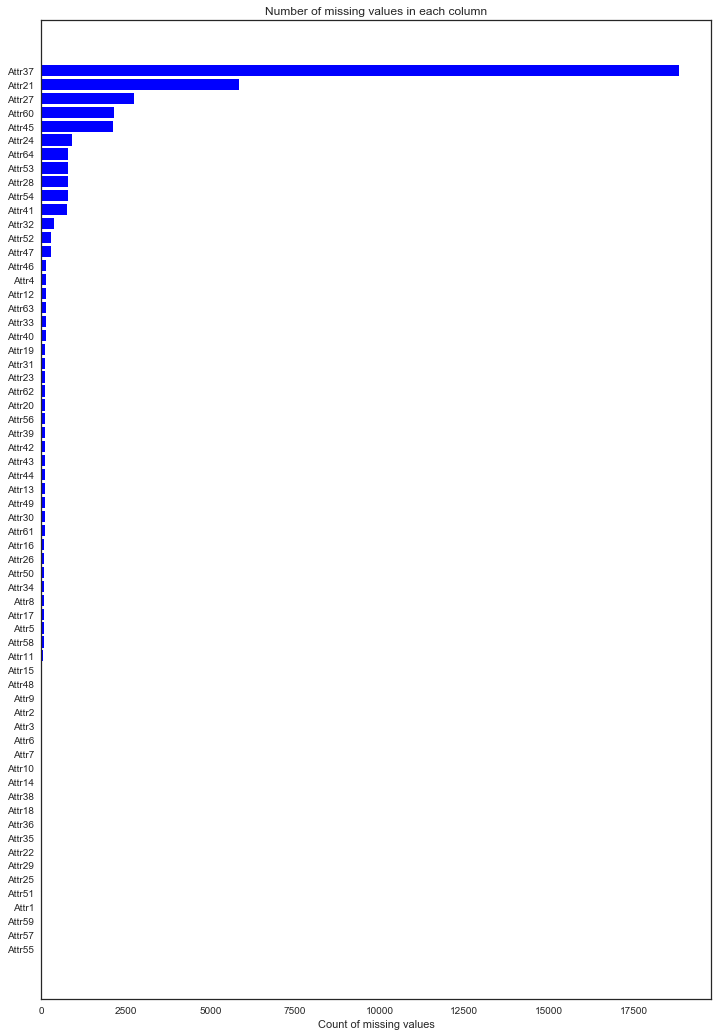

In [12]:
missing_df = bank.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.loc[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')


ind = np.arange(missing_df.shape[0])

width = 0.9

import matplotlib.pylab as plt

fig6, ax = plt.subplots(figsize=(12,18))
ax.barh(ind, missing_df.missing_count.values, color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(missing_df.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")
plt.show()
fig6.savefig('missing.png')

In [13]:
#total number of missingvalues
bank.isnull().sum(axis=0).sum()

41037

In [14]:
#let us look at attribute i.e"Attr37" so that we can decide whether to remove it or impute
#  we have current assets-inventories, long-termliabilities in other variables too, so we can happily remove it
# without worrying about missing information
bank=bank.drop(['Attr37'],axis=1)

In [15]:
#check for row wise missing value count
missing_df = bank.isnull().sum(axis=1).reset_index()
missing_df.columns = ['index', 'missing_count']
missing_df = missing_df.loc[missing_df['missing_count']>31]
missing_df = missing_df.sort_values(by='missing_count')

In [16]:
#removing rows with missingvalues greater than 50 percentage
for i in missing_df['index']:
    bank = bank.drop([i], axis=0)

In [17]:
bank.isnull().sum(axis=1).sort_values(ascending=False);

In [18]:
10739/42992

0.24979065872720507

In [19]:
#Columnames without Target Varible 
colnames=bank.columns
colnames=colnames[:-1]


In [20]:
#grouping Data according to range to print outliers 
ls=[]
for col in colnames:
    maxim=bank[col].max()
    if(maxim < float(1000)):
        ls.append(col)
print(ls)

['Attr1', 'Attr2', 'Attr3', 'Attr6', 'Attr7', 'Attr11', 'Attr14', 'Attr18', 'Attr22', 'Attr24', 'Attr29', 'Attr35', 'Attr48', 'Attr49', 'Attr51', 'Attr56', 'Attr57']


In [21]:
ms=[]
for col in colnames:
    maxim=bank[col].max()
    if(col not in ls):
        if(maxim < float(100000)):
            ms.append(col)
print(ms)

['Attr4', 'Attr8', 'Attr9', 'Attr10', 'Attr12', 'Attr13', 'Attr16', 'Attr17', 'Attr19', 'Attr21', 'Attr23', 'Attr25', 'Attr26', 'Attr28', 'Attr31', 'Attr33', 'Attr34', 'Attr36', 'Attr38', 'Attr39', 'Attr40', 'Attr42', 'Attr46', 'Attr50', 'Attr52', 'Attr59', 'Attr63']


In [22]:
ns=[]
for col in colnames:
    maxim=bank[col].max()
    if(col not in ls):
        if(col not in ms):
            ns.append(col)
print(ns)

['Attr5', 'Attr15', 'Attr20', 'Attr27', 'Attr30', 'Attr32', 'Attr41', 'Attr43', 'Attr44', 'Attr45', 'Attr47', 'Attr53', 'Attr54', 'Attr55', 'Attr58', 'Attr60', 'Attr61', 'Attr62', 'Attr64']


C:\Users\User\Anaconda3\lib\site-packages\seaborn\categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


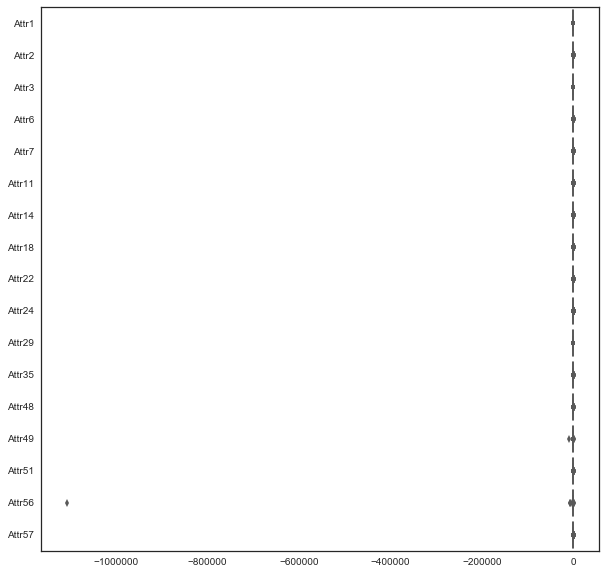

In [23]:
fig3, axs = plt.subplots(figsize=(10,10))
sns.boxplot(data=bank[ls],orient='h',palette="Set2")
plt.show()
fig3.savefig("ls.png")

In [24]:
#dropping outlier
bank = bank.drop([bank['Attr56'].idxmin()], axis=0)

C:\Users\User\Anaconda3\lib\site-packages\seaborn\categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


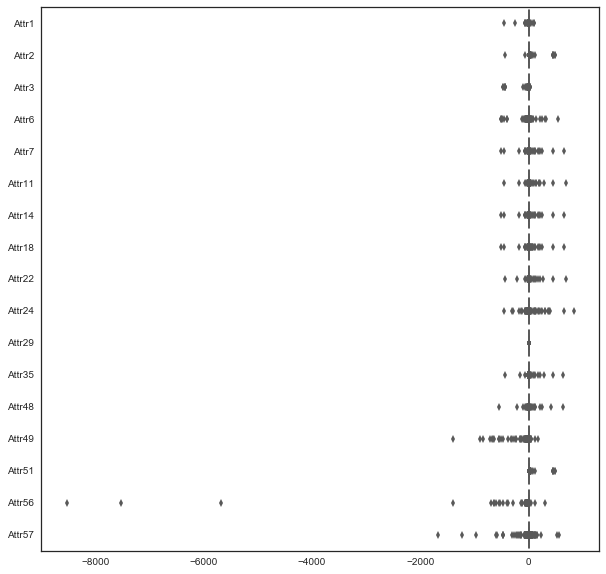

In [25]:
fig, axs = plt.subplots(figsize=(10,10))
sns.boxplot(data=bank[ls],orient='h',palette="Set2")
plt.show()

C:\Users\User\Anaconda3\lib\site-packages\seaborn\categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


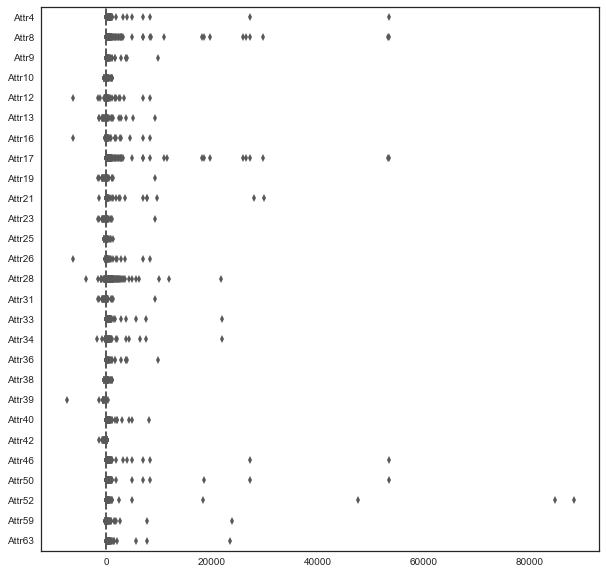

In [26]:
fig, axs = plt.subplots(figsize=(10,10))
sns.boxplot(data=bank[ms],orient='h',palette="Set2")
plt.show()

C:\Users\User\Anaconda3\lib\site-packages\seaborn\categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


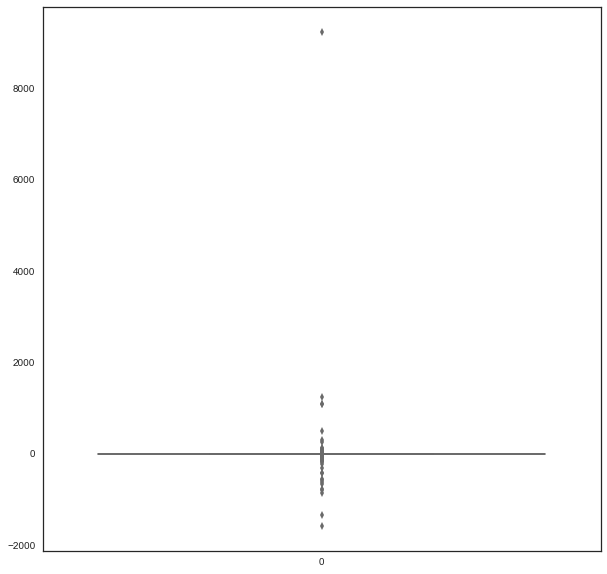

In [27]:
#Attr19 has outlier, lets check that
fig , axs =plt.subplots(figsize=(10,10))
sns.boxplot(data=bank["Attr19"],palette="Set3")
plt.show()

In [28]:
bank = bank.drop([bank['Attr19'].idxmax()], axis=0)

C:\Users\User\Anaconda3\lib\site-packages\seaborn\categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


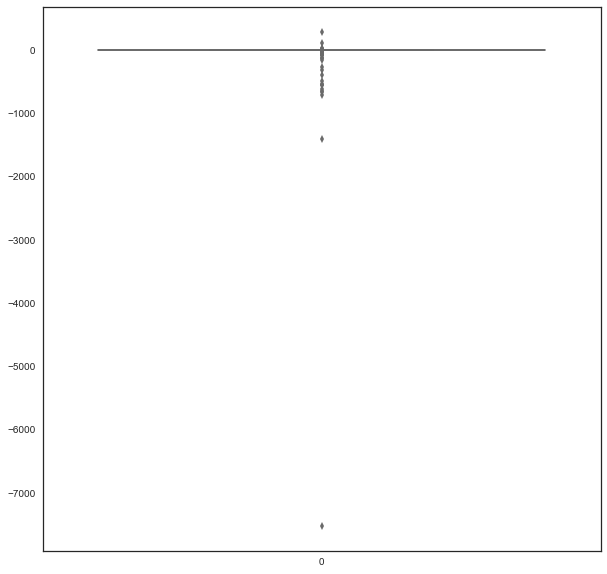

In [29]:
#Attr39 has outlier
fig , axs =plt.subplots(figsize=(10,10))
sns.boxplot(data=bank["Attr39"],palette="Set3")
plt.show()

In [30]:
bank = bank.drop([bank['Attr39'].idxmin()], axis=0)

C:\Users\User\Anaconda3\lib\site-packages\seaborn\categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


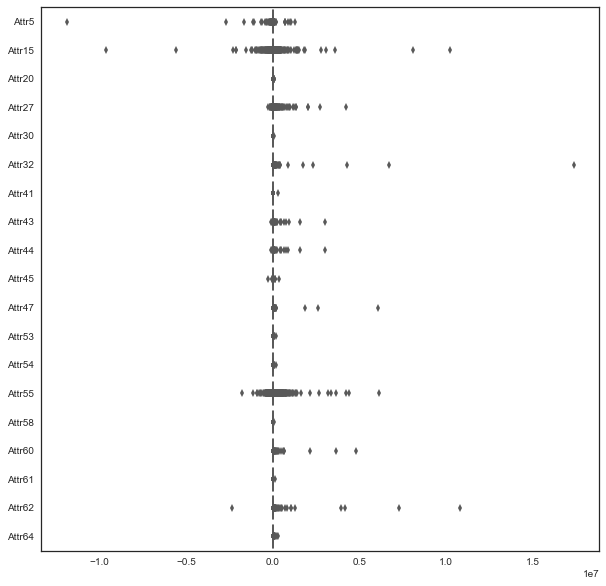

In [31]:
fig, axs = plt.subplots(figsize=(10,10))
sns.boxplot(data=bank[ns],orient='h',palette="Set2")
plt.show()

In [32]:
#Attr32 has an outlier
bank = bank.drop([bank['Attr32'].idxmax()], axis=0)

C:\Users\User\Anaconda3\lib\site-packages\seaborn\categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


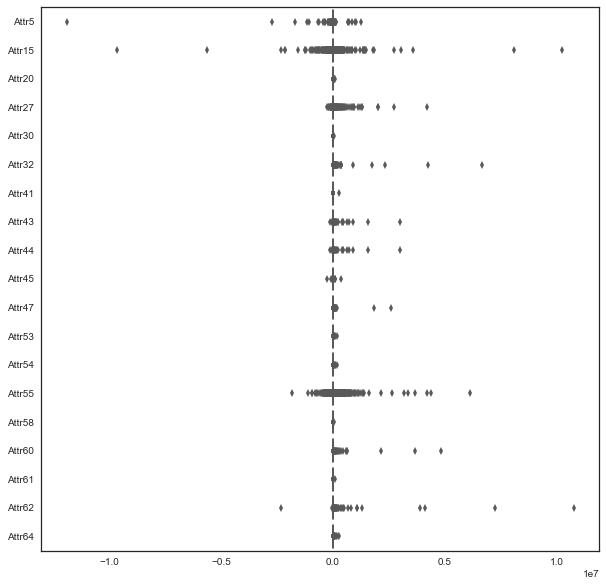

In [33]:
fig, axs = plt.subplots(figsize=(10,10))
sns.boxplot(data=bank[ns],orient='h',palette="Set2")
plt.show()

In [34]:
#Attr5 has an outlier
bank = bank.drop([bank['Attr5'].idxmin()], axis=0)

C:\Users\User\Anaconda3\lib\site-packages\seaborn\categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


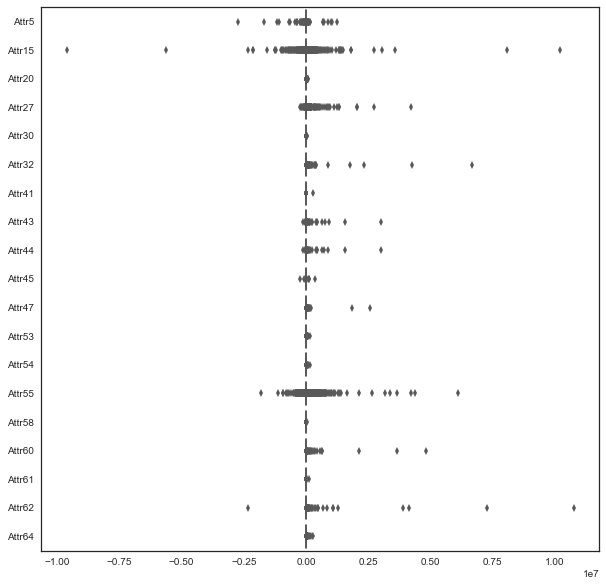

In [35]:
fig, axs = plt.subplots(figsize=(10,10))
sns.boxplot(data=bank[ns],orient='h',palette="Set2")
plt.show()

C:\Users\User\Anaconda3\lib\site-packages\seaborn\categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


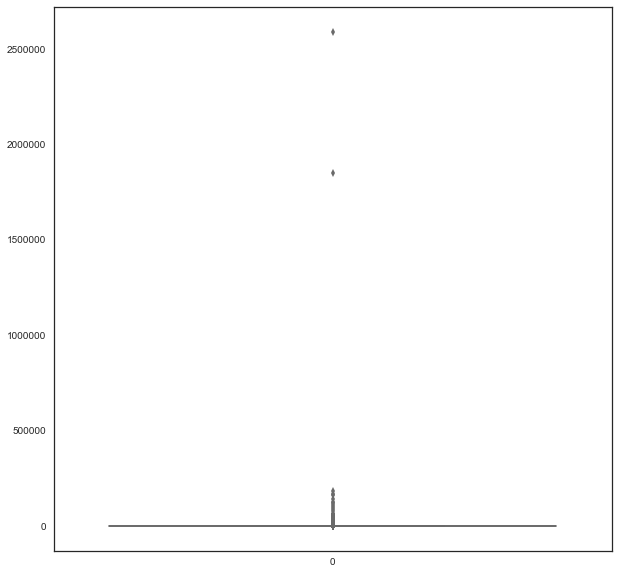

In [36]:
fig , axs =plt.subplots(figsize=(10,10))
sns.boxplot(data=bank["Attr47"],palette="Set3")
plt.show()

In [37]:
#Attr47 has two outliers
bank = bank.drop([bank['Attr47'].idxmax()], axis=0)

In [38]:
bank = bank.drop([bank['Attr47'].idxmax()], axis=0)

C:\Users\User\Anaconda3\lib\site-packages\seaborn\categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


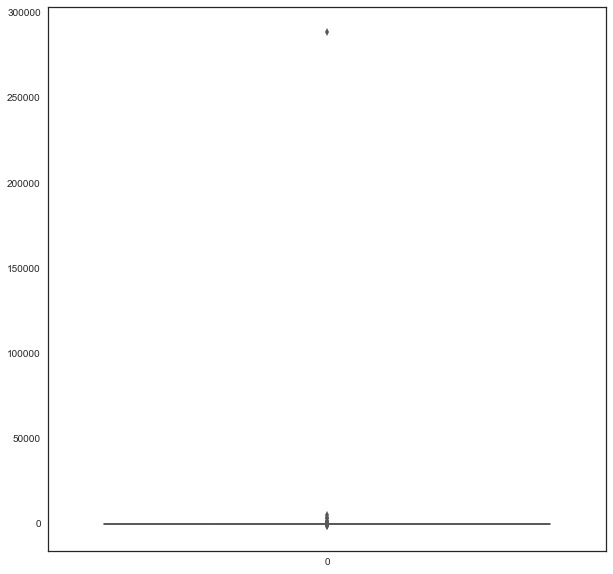

In [39]:
fig, axs = plt.subplots(figsize=(10,10))
sns.boxplot(data=bank["Attr41"],palette="Set2")
plt.show()

In [40]:
#Attr41 has an outlier
bank = bank.drop([bank['Attr41'].idxmax()], axis=0)

C:\Users\User\Anaconda3\lib\site-packages\seaborn\categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


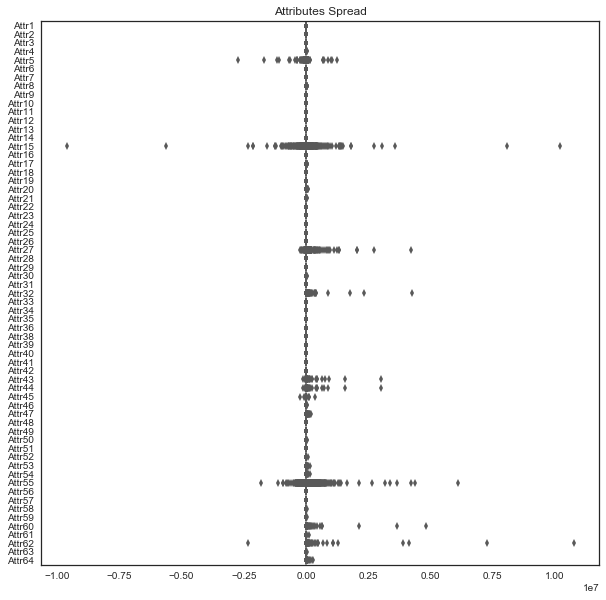

In [41]:
fig4, axs = plt.subplots(figsize=(10,10))
plt.title('Attributes Spread')

sns.boxplot(data=bank[colnames],orient='h',palette="Set2")
plt.show()
fig4.savefig('outliers.png')


#### Correlations

In [42]:
# Compute the pearson correlation matrix with complete cases
corr = bank.corr()

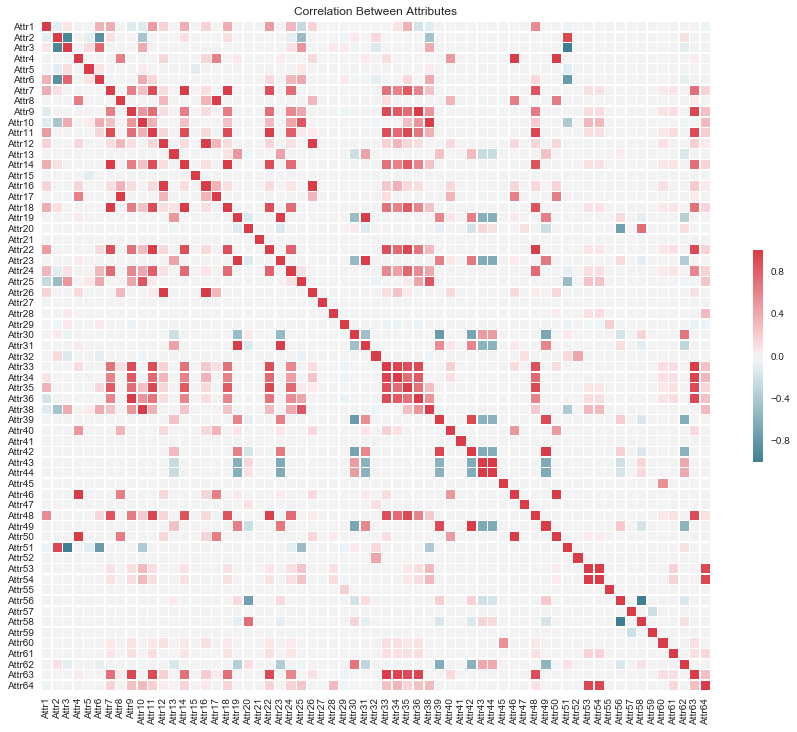

In [43]:


# Set up the matplotlib figure
f2, ax = plt.subplots(figsize=(15, 13))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.title("Correlation Between Attributes")


plt.xticks(rotation=90)
# Draw the heat map
p=sns.heatmap(corr, cmap=cmap, vmax=.4, center=0,
            square=True, linewidths=.5 ,cbar_kws={"shrink": .3})
#p.set_yticklabels(labels=colnames,rotation=0);
f2.savefig("correlationbefore.png")

In [44]:
#unstacking the correlation matrix , so that we can figure out highly correlated pairs
s = corr.unstack()
so = s.sort_values(ascending=False)
so

Attr64  Attr64    1.000000
Attr31  Attr31    1.000000
Attr34  Attr34    1.000000
Attr35  Attr35    1.000000
Attr36  Attr36    1.000000
Attr38  Attr38    1.000000
Attr39  Attr39    1.000000
Attr40  Attr40    1.000000
Attr41  Attr41    1.000000
Attr42  Attr42    1.000000
Attr43  Attr43    1.000000
Attr44  Attr44    1.000000
Attr45  Attr45    1.000000
Attr46  Attr46    1.000000
Attr47  Attr47    1.000000
Attr48  Attr48    1.000000
Attr49  Attr49    1.000000
Attr50  Attr50    1.000000
Attr51  Attr51    1.000000
Attr52  Attr52    1.000000
Attr53  Attr53    1.000000
Attr54  Attr54    1.000000
Attr55  Attr55    1.000000
Attr56  Attr56    1.000000
Attr57  Attr57    1.000000
Attr58  Attr58    1.000000
Attr59  Attr59    1.000000
Attr60  Attr60    1.000000
Attr61  Attr61    1.000000
Attr33  Attr33    1.000000
Attr30  Attr30    1.000000
Attr63  Attr63    1.000000
Attr29  Attr29    1.000000
Attr2   Attr2     1.000000
Attr3   Attr3     1.000000
Attr4   Attr4     1.000000
Attr5   Attr5     1.000000
A

In [45]:
so1=so.loc[(so.values>0.9) & (so.values<1)]

In [46]:
#correlations greater than 0.9 excluding individual correlations
so1 = so1.sort_values()
so1

Attr14  Attr11    0.901092
Attr11  Attr14    0.901092
        Attr7     0.901092
Attr7   Attr11    0.901092
Attr63  Attr48    0.901511
Attr48  Attr63    0.901511
Attr63  Attr11    0.906673
Attr11  Attr63    0.906673
Attr39  Attr49    0.907526
Attr49  Attr39    0.907526
Attr33  Attr9     0.907726
Attr9   Attr33    0.907726
Attr63  Attr35    0.909334
Attr35  Attr63    0.909334
Attr63  Attr22    0.909529
Attr22  Attr63    0.909529
Attr33  Attr36    0.910886
Attr36  Attr33    0.910886
Attr48  Attr35    0.919006
Attr35  Attr48    0.919006
Attr11  Attr35    0.924100
Attr35  Attr11    0.924100
Attr53  Attr64    0.925139
Attr64  Attr53    0.925139
Attr39  Attr42    0.925567
Attr42  Attr39    0.925567
Attr54  Attr64    0.926141
Attr64  Attr54    0.926141
Attr51  Attr2     0.926773
Attr2   Attr51    0.926773
Attr63  Attr36    0.931308
Attr36  Attr63    0.931308
Attr22  Attr35    0.933845
Attr35  Attr22    0.933845
Attr63  Attr9     0.933993
Attr9   Attr63    0.933993
Attr33  Attr34    0.939196
A

In [47]:
#negative correlations less than -0.9
so2=so.loc[(so.values<-0.9)]
so2

Attr2   Attr3    -0.926990
Attr3   Attr2    -0.926990
Attr56  Attr58   -0.995461
Attr58  Attr56   -0.995461
Attr3   Attr51   -0.998228
Attr51  Attr3    -0.998228
dtype: float64

In [48]:
#removing attributes which are highly correlated and there is no loss of data
bank=bank.drop(["Attr51"],axis=1)
bank=bank.drop(['Attr14'],axis=1)
bank=bank.drop(['Attr63'],axis=1)

In [49]:
bank.isnull().sum().sort_values(ascending=False);

In [50]:
#checking for correlations again
corr1=bank.corr()

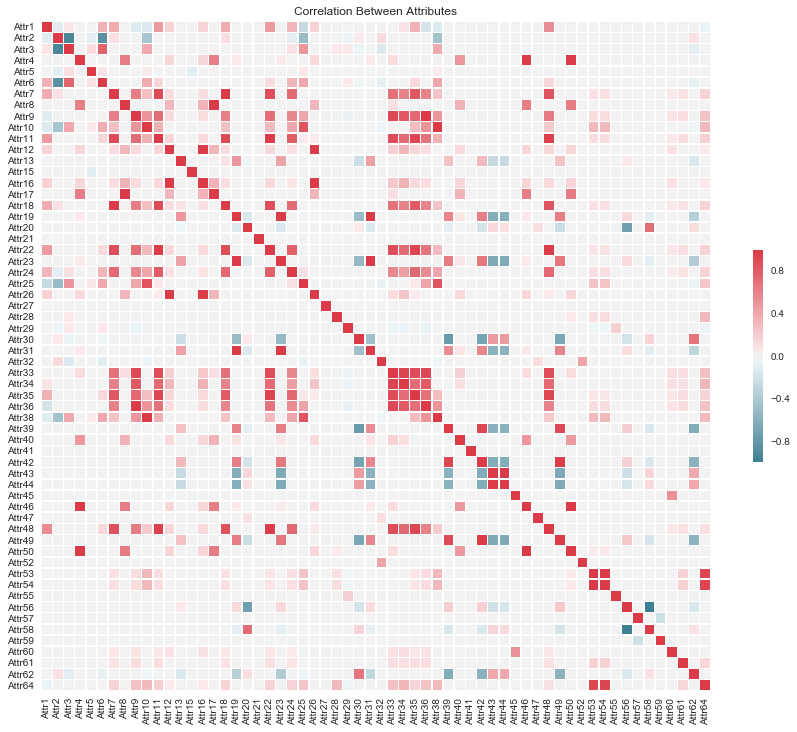

In [51]:

sns.set(style="white")


# Set up the matplotlib figure
f1, ax = plt.subplots(figsize=(15, 13))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.title("Correlation Between Attributes")
plt.xticks(rotation=90)
# Draw the heatmap 
p=sns.heatmap(corr1, cmap=cmap, vmax=.4, center=0,
            square=True, linewidths=.5 ,cbar_kws={"shrink": .3})
#p.set_yticklabels(labels=colnames,rotation=0);
f1.savefig("correlationafter.png")

In [52]:
s2 = corr1.unstack()
so3 = s2.sort_values(kind="quicksort",ascending=False)
so3

Attr64  Attr64    1.000000
Attr46  Attr46    1.000000
Attr33  Attr33    1.000000
Attr34  Attr34    1.000000
Attr35  Attr35    1.000000
Attr36  Attr36    1.000000
Attr38  Attr38    1.000000
Attr39  Attr39    1.000000
Attr40  Attr40    1.000000
Attr41  Attr41    1.000000
Attr42  Attr42    1.000000
Attr43  Attr43    1.000000
Attr44  Attr44    1.000000
Attr45  Attr45    1.000000
Attr47  Attr47    1.000000
Attr31  Attr31    1.000000
Attr48  Attr48    1.000000
Attr49  Attr49    1.000000
Attr50  Attr50    1.000000
Attr52  Attr52    1.000000
Attr53  Attr53    1.000000
Attr54  Attr54    1.000000
Attr55  Attr55    1.000000
Attr56  Attr56    1.000000
Attr57  Attr57    1.000000
Attr58  Attr58    1.000000
Attr59  Attr59    1.000000
Attr60  Attr60    1.000000
Attr32  Attr32    1.000000
Attr30  Attr30    1.000000
Attr62  Attr62    1.000000
Attr15  Attr15    1.000000
Attr2   Attr2     1.000000
Attr3   Attr3     1.000000
Attr4   Attr4     1.000000
Attr5   Attr5     1.000000
Attr6   Attr6     1.000000
A

In [53]:
so3=so3.loc[(so3.values>0.9) & (so3.values<1)]

In [54]:
so3 = so3.sort_values()
so3

Attr11  Attr7     0.901092
Attr7   Attr11    0.901092
Attr49  Attr39    0.907526
Attr39  Attr49    0.907526
Attr33  Attr9     0.907726
Attr9   Attr33    0.907726
Attr36  Attr33    0.910886
Attr33  Attr36    0.910886
Attr35  Attr48    0.919006
Attr48  Attr35    0.919006
Attr11  Attr35    0.924100
Attr35  Attr11    0.924100
Attr64  Attr53    0.925139
Attr53  Attr64    0.925139
Attr42  Attr39    0.925567
Attr39  Attr42    0.925567
Attr54  Attr64    0.926141
Attr64  Attr54    0.926141
Attr35  Attr22    0.933845
Attr22  Attr35    0.933845
Attr34  Attr33    0.939196
Attr33  Attr34    0.939196
Attr48  Attr11    0.950749
Attr11  Attr48    0.950749
Attr26  Attr12    0.977716
Attr12  Attr26    0.977716
Attr22  Attr48    0.978892
Attr48  Attr22    0.978892
Attr12  Attr16    0.981899
Attr16  Attr12    0.981899
Attr22  Attr11    0.982356
Attr11  Attr22    0.982356
Attr23  Attr31    0.988768
Attr31  Attr23    0.988768
Attr16  Attr26    0.991285
Attr26  Attr16    0.991285
Attr31  Attr19    0.993591
A

In [55]:
#no negative correlations now
so4=so3.loc[(so3.values<-0.9)]
so4

Series([], dtype: float64)

In [56]:
#dropping all higly correlated variabes with missing values,and no significant loss of data
bank=bank.drop(['Attr46'],axis=1)
bank=bank.drop(['Attr50'],axis=1)
bank=bank.drop(['Attr9'],axis=1)
bank=bank.drop(['Attr10'],axis=1)
bank=bank.drop(['Attr12'],axis=1)
bank=bank.drop(['Attr48'],axis=1)
bank=bank.drop(['Attr35'],axis=1)
bank=bank.drop(['Attr33'],axis=1)
bank=bank.drop(['Attr17'],axis=1)
bank=bank.drop(['Attr18'],axis=1)
bank=bank.drop(['Attr22'],axis=1)
bank=bank.drop(['Attr44'],axis=1)
bank=bank.drop(['Attr53'],axis=1)
bank=bank.drop(['Attr42'],axis=1)
bank=bank.drop(['Attr19'],axis=1)
bank=bank.drop(['Attr64'],axis=1)
bank=bank.drop(['Attr23'],axis=1)

In [57]:
corr2=bank.corr()

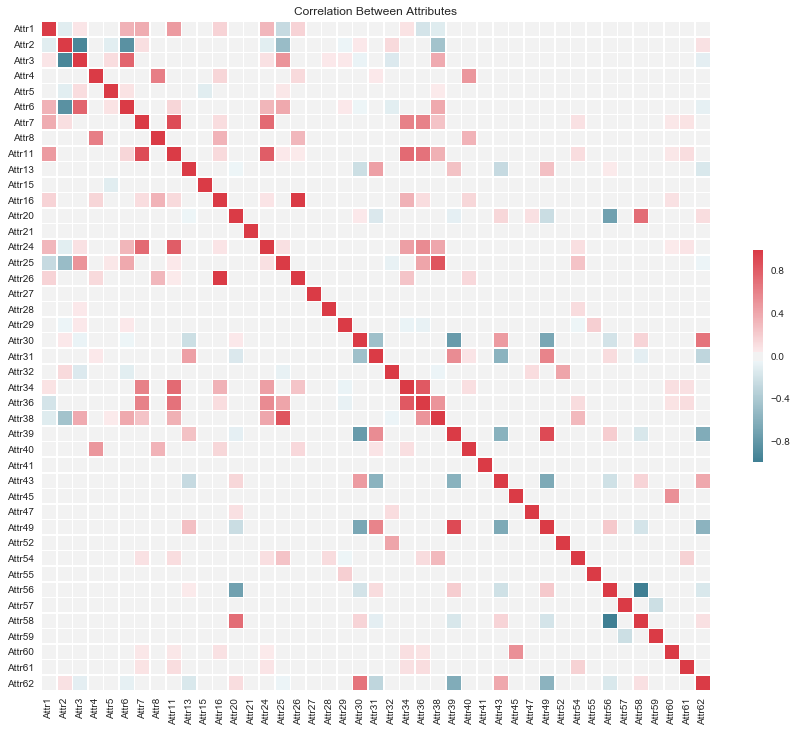

In [58]:
sns.set(style="white")


# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 13))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.title("Correlation Between Attributes")
plt.xticks(rotation=90)
# Draw the heatmap with the mask and correct aspect ratio
p=sns.heatmap(corr2, cmap=cmap, vmax=.4, center=0,
            square=True, linewidths=.5 ,cbar_kws={"shrink": .3})
f.savefig("correlationafter.png")

In [59]:
s3 = corr2.unstack()
so5 = s3.sort_values(kind="quicksort",ascending=False)
so5

Attr62  Attr62    1.000000
Attr30  Attr30    1.000000
Attr34  Attr34    1.000000
Attr36  Attr36    1.000000
Attr38  Attr38    1.000000
Attr39  Attr39    1.000000
Attr40  Attr40    1.000000
Attr41  Attr41    1.000000
Attr43  Attr43    1.000000
Attr45  Attr45    1.000000
Attr47  Attr47    1.000000
Attr49  Attr49    1.000000
Attr52  Attr52    1.000000
Attr54  Attr54    1.000000
Attr55  Attr55    1.000000
Attr56  Attr56    1.000000
Attr57  Attr57    1.000000
Attr58  Attr58    1.000000
Attr59  Attr59    1.000000
Attr32  Attr32    1.000000
Attr29  Attr29    1.000000
Attr61  Attr61    1.000000
Attr28  Attr28    1.000000
Attr2   Attr2     1.000000
Attr3   Attr3     1.000000
Attr4   Attr4     1.000000
Attr5   Attr5     1.000000
Attr6   Attr6     1.000000
Attr7   Attr7     1.000000
Attr8   Attr8     1.000000
Attr11  Attr11    1.000000
Attr13  Attr13    1.000000
Attr15  Attr15    1.000000
Attr16  Attr16    1.000000
Attr20  Attr20    1.000000
Attr21  Attr21    1.000000
Attr24  Attr24    1.000000
A

In [60]:
#we still have correlations, but we loose data if we remove these variables
so5=so5.loc[(so5.values>0.9) & (so5.values<1)]
so5

Attr16  Attr26    0.991285
Attr26  Attr16    0.991285
Attr49  Attr39    0.907526
Attr39  Attr49    0.907526
Attr11  Attr7     0.901092
Attr7   Attr11    0.901092
dtype: float64

In [61]:
bank.shape

(42984, 44)

### Target Variable

In [62]:
# For missing value imptutation, we are removing Target variable  
Target =bank['target']
Graphbank=bank
bank=bank.drop(['target'],axis=1)

In [63]:
#copying data  
bank1=bank

In [64]:
Target=Target.astype("category")

#### Missing value Imputation

In [65]:
#central imputation
from sklearn.preprocessing import Imputer
imp=Imputer(missing_values='NaN', strategy='median')
imputed=imp.fit_transform(bank1)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [66]:
#converting imputed matrix into dataframe
bank_imputed=pd.DataFrame(imputed,columns=bank1.columns)

In [67]:
bank_imputed.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr11,Attr13,Attr15,Attr16,Attr20,Attr21,Attr24,Attr25,Attr26,Attr27,Attr28,Attr29,Attr30,Attr31,Attr32,Attr34,Attr36,Attr38,Attr39,Attr40,Attr41,Attr43,Attr45,Attr47,Attr49,Attr52,Attr54,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,0.249760,0.166600,497.42,0.73378,43.370,1.2479,0.47706,0.50494,0.60411,1.45820,1.7615,5.9443,0.11788,0.149420,94.14,0.56393,1.7410,0.50591,0.128040,0.662950,0.051402,114.42,1.00970,49.394,0.110850,0.25792,2.2480,348690.0,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,0.261140,0.158350,677.96,0.53838,87.981,1.4293,0.15501,0.39542,0.43992,88.44400,16.9460,3.6884,0.26969,0.152000,122.17,2.98760,1.6996,0.49788,0.121300,0.086422,0.064371,199.49,0.51045,100.130,0.139610,0.33472,17.8660,2304.6,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,0.312580,0.244350,794.16,0.45961,73.133,1.4283,0.15501,0.28932,0.37282,86.01100,1.0627,4.3749,0.41929,0.238150,176.93,1.42740,1.3090,0.51537,0.241140,0.322020,0.074020,165.51,0.94807,96.372,0.222930,0.48474,2.0504,6332.7,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,0.092704,0.094257,917.01,0.39803,79.788,1.5069,0.17193,0.57353,0.36152,0.94076,1.9618,4.6511,0.14343,0.071428,91.37,0.37581,1.3562,0.57353,0.088995,0.401390,0.069622,180.77,0.28720,84.344,0.066165,0.25033,2.4524,20545.0,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,0.187320,0.121820,1133.20,0.32211,57.045,1.0454,0.18732,0.38677,0.32211,1.41380,1.1184,4.1424,0.27884,0.115530,147.04,0.32340,1.6278,0.43489,0.122310,0.293040,0.096680,141.62,0.73919,65.936,0.116010,0.40285,2.1184,3186.6,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210


#### Splitting Data into Train and Test

In [68]:
#import knnimpute
from sklearn import preprocessing, metrics
from sklearn.model_selection import train_test_split

In [69]:
from sklearn.model_selection import cross_validate

In [70]:
#splitting data 
X_train, X_test, y_train, y_test = train_test_split(bank_imputed, Target, test_size=0.20)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(34387, 43)
(8597, 43)
(34387,)
(8597,)


#### Standardizing Data

In [71]:
from sklearn.preprocessing import StandardScaler

In [72]:
std = StandardScaler()
std.fit(X_train)
X_train_std= std.transform(X_train)
X_test_std= std.transform(X_test)

In [73]:
y_train.value_counts()

No     32732
Yes     1655
Name: target, dtype: int64

In [74]:
#4.8 percent of data are Yes's 
1658/(32722+1658)

0.04822571262361838

In [75]:
y_test.value_counts()

No     8170
Yes     427
Name: target, dtype: int64

In [76]:
424/(8173)

0.051878135323626576

### Model Building

In [77]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_graphviz,DecisionTreeRegressor

#### a. Logistic Regression

In [78]:

clf = LogisticRegression(random_state=0,multi_class='multinomial',solver='saga',
                         class_weight='balanced').fit(X_train, y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [79]:
y_pred=clf.predict(X_test)

y_pred_prob=clf.predict_proba(X_test) 

In [80]:
confusion_matrix(y_test,y_pred)

array([[5984, 2186],
       [ 209,  218]], dtype=int64)

In [81]:
print(classification_report(y_test,y_pred,digits=4))

              precision    recall  f1-score   support

          No     0.9663    0.7324    0.8333      8170
         Yes     0.0907    0.5105    0.1540       427

   micro avg     0.7214    0.7214    0.7214      8597
   macro avg     0.5285    0.6215    0.4936      8597
weighted avg     0.9228    0.7214    0.7995      8597



In [82]:
##### Roc Curves and AUC

In [83]:
y_test_bin= y_test.replace( {"Yes": 1, "No": 0})

In [84]:
fpr, tpr,threshold= roc_curve(y_test_bin, y_pred_prob[:,1])
roc_auc = auc(fpr, tpr) 

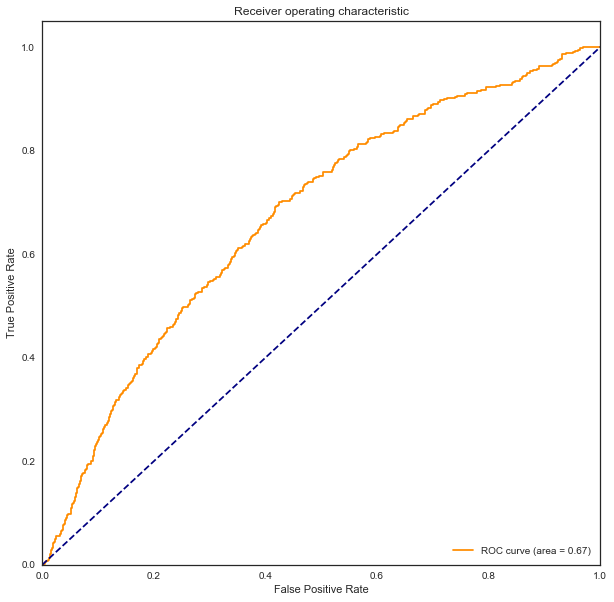

In [85]:
fig2,ax=plt.subplots(figsize=(10,10))

plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
fig2.savefig("roc.png")

In [86]:
#here we could change the regressor to logloss and compute probabilities and fix a threshold

#### b. Naive Bayes 

In [87]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [88]:
clf = gnb.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [89]:
confusion_matrix(y_test,y_pred)

array([[ 233, 7937],
       [  15,  412]], dtype=int64)

In [90]:
 print(classification_report(y_test,y_pred,digits=4))

              precision    recall  f1-score   support

          No     0.9395    0.0285    0.0554      8170
         Yes     0.0493    0.9649    0.0939       427

   micro avg     0.0750    0.0750    0.0750      8597
   macro avg     0.4944    0.4967    0.0746      8597
weighted avg     0.8953    0.0750    0.0573      8597



In [91]:
#SMOTE (Synthetic Minority Over-sampling TEchnique)
from imblearn.over_sampling import SMOTE

In [92]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

In [93]:
clf = gnb.fit(X_train_res,y_train_res)
y_pred=clf.predict(X_test)

In [94]:
sum(y_train_res=="Yes")

32732

In [95]:
confusion_matrix(y_test,y_pred)

array([[ 247, 7923],
       [  18,  409]], dtype=int64)

In [96]:
print(classification_report(y_test,y_pred,digits=4))

              precision    recall  f1-score   support

          No     0.9321    0.0302    0.0586      8170
         Yes     0.0491    0.9578    0.0934       427

   micro avg     0.0763    0.0763    0.0763      8597
   macro avg     0.4906    0.4940    0.0760      8597
weighted avg     0.8882    0.0763    0.0603      8597



#### c. K-Nearest Neighbours Classification

In [97]:
knn = KNeighborsClassifier(n_neighbors=5, p=2)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [98]:
predictions = knn.predict(X_test)

In [99]:
confusion_matrix(y_test,predictions)

array([[8141,   29],
       [ 425,    2]], dtype=int64)

In [100]:
print(classification_report(y_test,predictions,digits=4))

              precision    recall  f1-score   support

          No     0.9504    0.9965    0.9729      8170
         Yes     0.0645    0.0047    0.0087       427

   micro avg     0.9472    0.9472    0.9472      8597
   macro avg     0.5075    0.5006    0.4908      8597
weighted avg     0.9064    0.9472    0.9250      8597



In [101]:
print(accuracy_score(y_test,predictions))

0.9471908805397231


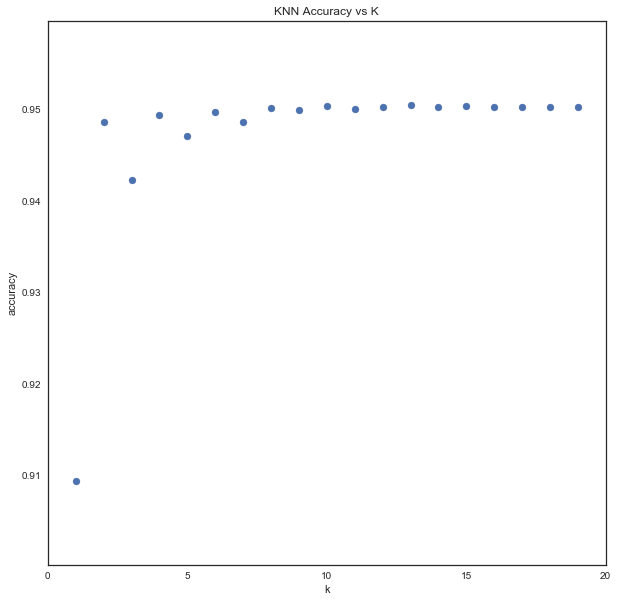

In [102]:
#inding the best K -Value 
k_range =range(1,20)
scores=[]
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
fig1,ax=plt.subplots(figsize=(10,10))
plt.xlabel('k')
plt.title("KNN Accuracy vs K")
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])
fig1.savefig("KNNaccuracy.png")

#### d. Decision Trees

In [103]:
clf = DecisionTreeClassifier(max_depth=4,class_weight="balanced")
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[5929, 2241],
       [  92,  335]], dtype=int64)

In [104]:
print(classification_report(y_test,y_pred,digits=4))

              precision    recall  f1-score   support

          No     0.9847    0.7257    0.8356      8170
         Yes     0.1300    0.7845    0.2231       427

   micro avg     0.7286    0.7286    0.7286      8597
   macro avg     0.5574    0.7551    0.5294      8597
weighted avg     0.9423    0.7286    0.8052      8597



In [105]:
import graphviz

In [106]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [107]:
def plot_tree(tree,dataframe,label_col,plot_title):
    label_names=pd.unique(dataframe[label_col])
    # Obtaining plot data.
    graph_data=export_graphviz(tree,feature_names=dataframe.drop(label_col,axis=1).columns,
                               class_names=label_names,filled=True,rounded=True,out_file=None)

    # Generating plot.
    graph=graphviz.Source(graph_data)
    graph.render(plot_title)
    graph.render(filename ="Decision.png") 
    return graph

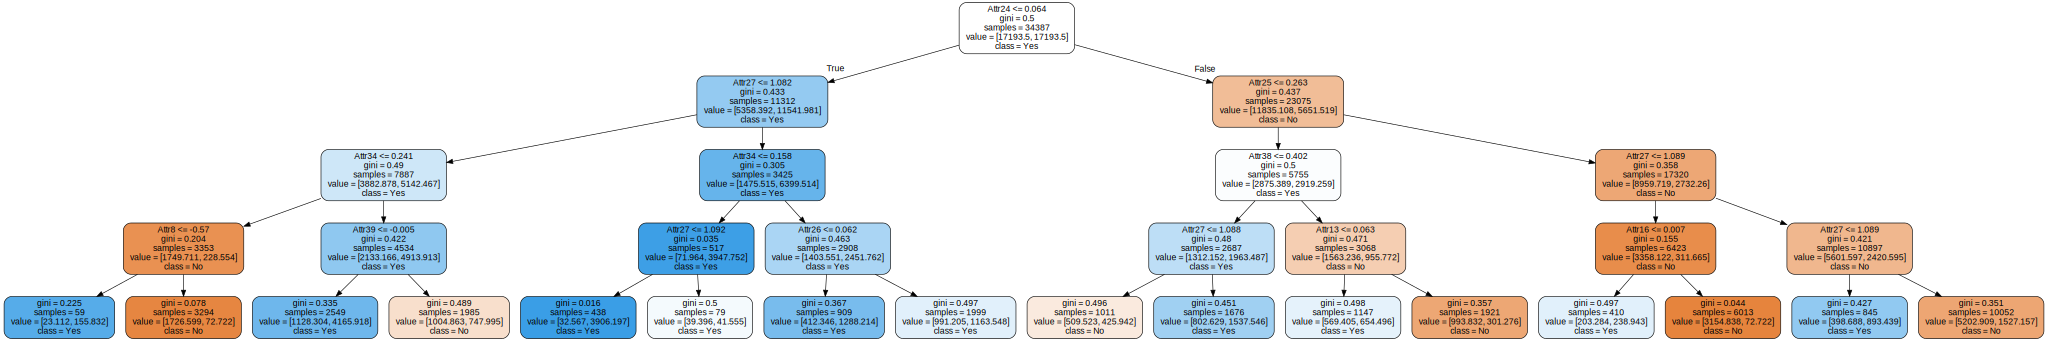

In [108]:
tree_graph=plot_tree(clf,Graphbank,"target","plot")
tree_graph

#### e. RandomForest Classification

In [109]:
rfc = RandomForestClassifier(n_jobs=-1, max_features='sqrt') 
 
 #Use a grid over parameters of interest
param_grid = { 
           "n_estimators" : [9, 18, 27, 36, 45, 54, 63],
           "max_depth" : [5, 10],
           "min_samples_leaf" : [2, 4]}
 
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 10)
CV_rfc.fit(X=X_train, y=y_train)
print (CV_rfc.best_score_, CV_rfc.best_params_)

0.9587344054439177 {'max_depth': 10, 'min_samples_leaf': 4, 'n_estimators': 9}


In [110]:
clf = RandomForestClassifier(n_estimators=18,max_depth= 10, min_samples_leaf = 4,oob_score=True) #class weight

In [111]:
clf.fit(X=X_train, y=y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred,digits=4))

C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


0.95684541118995
              precision    recall  f1-score   support

          No     0.9569    0.9996    0.9778      8170
         Yes     0.9516    0.1382    0.2413       427

   micro avg     0.9568    0.9568    0.9568      8597
   macro avg     0.9542    0.5689    0.6095      8597
weighted avg     0.9566    0.9568    0.9412      8597



In [112]:
confusion_matrix(y_test,y_pred)

array([[8167,    3],
       [ 368,   59]], dtype=int64)

In [113]:
importances = clf.feature_importances_

feat_importances = pd.Series(importances, index=X_train.columns)

%matplotlib inline

#Attr24 -gross profit (in 3 years) / total assets 
#Attr34	operating expenses / total liabilities 
#Attr27	profit on operating activities / financial expenses                #



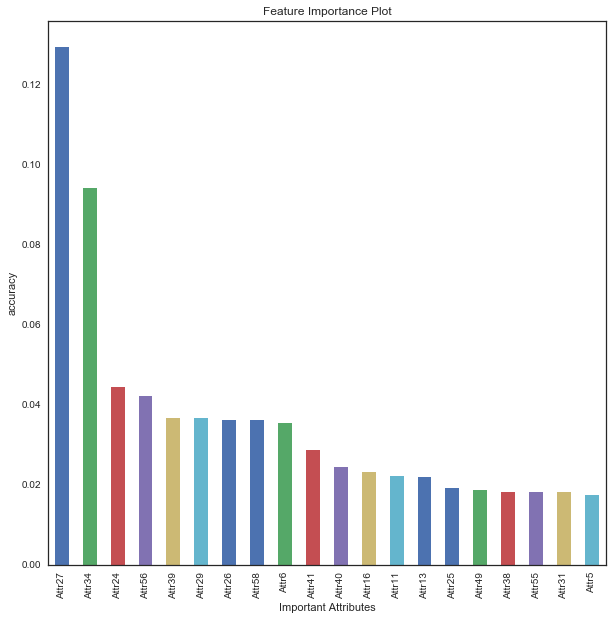

In [114]:
fig5,ax=plt.subplots(figsize=(10,10))
plt.title('Feature Importance Plot')
plt.xlabel('Important Attributes')
plt.ylabel('accuracy')
feat_importances.nlargest(20).plot(kind='bar')
fig5.savefig("featureimportance.png")

So, The Best model is the model with High Recall and  Accuracy scores

so, here Decision Trees performed well.